![](https://www.lamarchaberkeley.com/wp-content/uploads/2016/02/paella-perfected.jpg)

# <p style="text-align: center;"> SF Employee Compensation </p>
## <p style="text-align: center;"> Main insights regarding the income in the city </p>
#### <p style="text-align: right;"> Made by Ihor Markevych </p>

**Structure:**
(clickable)

1. [Objective of the Proposed Research](#objective)
1. [Data Exploration](#data_exploration)
    - [Aspect 1](#aspect1)
    - [Aspect 2](#aspect2)
    - [Aspect 3](#aspect3)
    - [Aspect 4](#aspect4)
    - [Aspect 5](#aspect5)
    - [Aspect 6](#aspect6)
    - [Aspect 7](#aspect7)
    - [Aspect 8](#aspect8)
    - [Aspect 9](#aspect9)
1. [Summary](#summary)
1. [Recommendations](#recommendations)


From SF Office of the Controller:  
_Generally negative salaries in this dataset represent an adjustment to the employee’s pay. One example where this would occur would be an employee being erroneously overpaid on the last pay period of one fiscal year, with an adjustment then being made to recapture the amount on the next pay period in the subsequent fiscal year. This would cause a negative value to appear on the record for the second fiscal year, assuming the employee did not receive sufficient additional pay for the same year, cost center, and type to offset the adjustment._

<a id='objective'></a>
<img src="https://www.aiip.org/resources/Pictures/AIIP%20Website%20Icons/AIIP%20Research%20Icon.png" alt="Drawing" style="width: 100px; hight: 100px; float:right; padding:10px"/>
## <span style="color:red"> Objective of the Proposed Research: </span>

We have the database of the salary and benefits paid to City employees since fiscal year 2013. Using this database, we are going to look at the total salary by job family groups, find most popular of them and visualize denisty of salaries for all of those groups. We'll find mean salary to understand general level of income.
  
Next, we are going to see health and dental benefits and find, which job families have those benefits above average.  
  
Then we are going to see the lowes paid jobs.

After this we'll move to organisations and discover, which organization groups give most benefits to their workers.
  
We'll find biggest overtime values to see how much emploees overwork. We'll also discover how big retirements contributions are.  

**<p style="text-align: center;">Let's start out journey into data!</p>**
![](https://media1.giphy.com/media/m8YFup5AVSW4/200w.webp?cid=790b7611ca914cb8a320ab088f8fdf099bd4c19990a6c34f&rid=200w.webp)

<a id='data_exploration'></a>

<img src="https://images-na.ssl-images-amazon.com/images/I/61WSgQaUVXL._SX466_.jpg" alt="Drawing" style="width: 100px; hight: 100px; float:right; padding:10px"/>

## <span style="color:red"> Data exploration: </span>

_load libraries_

In [1]:
library(tidyverse)
library(pastecs)
library(viridis)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'pastecs'

The following objects are masked from 'package:dplyr':

    first, last

The following object is masked from 'package:tidyr':

    extract

Loading required package: viridisLite


_read data from csv_

In [2]:
salaryData <- read.csv('./data/employee-compensation.csv')

<a id='aspect1'></a>

###  <span style="color:blue"> Aspect 1: </span>

Firstly, we need to get an understanding of our data. One of the way of getting initial one is to check **first rows of dataframe**.

In [3]:
head(salaryData)

Year.Type,Year,Organization.Group.Code,Organization.Group,Department.Code,Department,Union.Code,Union,Job.Family.Code,Job.Family,...,Employee.Identifier,Salaries,Overtime,Other.Salaries,Total.Salary,Retirement,Health.and.Dental,Other.Benefits,Total.Benefits,Total.Compensation
Calendar,2028,7,General City Responsibilities,229259,,792,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,...,8540990,674.28,0.00,5.76,680.04,130.91,0.00,53.86,184.77,864.81
Calendar,2028,1,Public Protection,CRT,,792,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,...,8540990,674.28,0.00,5.76,680.04,130.91,0.00,53.86,184.77,864.81
Fiscal,2028,1,Public Protection,CRT,,792,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,...,8540990,674.28,0.00,5.76,680.04,130.91,0.00,53.86,184.77,864.81
Calendar,2019,7,General City Responsibilities,232108,,911,POA,Q000,Police Services,...,8577148,124709.01,100499.62,5501.78,230710.41,23271.86,14293.60,3934.00,55975.56,286685.97
Calendar,2019,1,Public Protection,DAT,,311,Municipal Attorneys Assoc,8100,Legal & Court,...,8603109,155489.01,0.00,1500.00,156989.01,29239.75,14308.46,11100.60,69326.83,226315.84
Calendar,2019,7,General City Responsibilities,102644,,130,"Auto Machinist, Local 1414",7300,Journeyman Trade,...,8547213,69490.84,34969.05,13344.53,117804.42,16424.93,14308.44,9651.75,48573.42,166377.84


<a id='aspect2'></a>

###  <span style="color:blue"> Aspect 2: </span>

Then let's get **all row names and info re. their type**:

In [4]:
str(salaryData)

'data.frame':	835307 obs. of  22 variables:
 $ Year.Type              : Factor w/ 2 levels "Calendar","Fiscal": 1 1 2 1 1 1 1 1 1 1 ...
 $ Year                   : int  2028 2028 2028 2019 2019 2019 2019 2019 2019 2019 ...
 $ Organization.Group.Code: int  7 1 1 7 1 7 7 7 4 1 ...
 $ Organization.Group     : Factor w/ 7 levels "Community Health",..: 4 6 6 4 6 4 4 4 1 6 ...
 $ Department.Code        : Factor w/ 113 levels "","__NOT_APPLICABLE__",..: 19 69 69 40 73 3 75 3 77 99 ...
 $ Department             : Factor w/ 57 levels "","AAM Asian Art Museum",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Union.Code             : int  792 792 792 911 311 130 790 253 858 911 ...
 $ Union                  : Factor w/ 130 levels "","Auto Machinist, Local 1414",..: 130 130 130 81 61 2 100 128 114 81 ...
 $ Job.Family.Code        : Factor w/ 59 levels "__UNASSIGNED__",..: 2 2 2 57 45 42 46 50 16 57 ...
 $ Job.Family             : Factor w/ 59 levels "Administrative-DPW/PUC",..: 59 59 59 38 27 25 43 55 34 38 ...
 $ 

<a id='aspect3'></a>

###  <span style="color:blue"> Aspect 3: </span>

Let's check for **mean for Salary** column:

In [5]:
salaries <- salaryData$Salaries
stat.desc(salaries, basic=F)['mean']

mean 
54096.81

We can see mean here and from it we can get understanding about average salary level.

But what **types of jobs** do we actually have?

_get all unique Job Families_

In [6]:
jobFamilies <- unique(salaryData[,'Job.Family'])
jobFamilies <- jobFamilies[jobFamilies!='Untitled']
jobFamilies

[1] Police Services                Legal & Court                 
 [3] Journeyman Trade               Protection & Apprehension     
 [5] Street Transit                 Nursing                       
 [7] Human Services                 Personnel                     
 [9] Professional Engineering       Budget, Admn & Stats Analysis 
[11] Management                     Correction & Detention        
[13] Semi-Skilled & General Labor   Housekeeping & Laundry        
[15] Public Service Aide            Community Development         
[17] Lab, Pharmacy & Med Techs      Clerical, Secretarial & Steno 
[19] Information Systems            Sub-Professional Engineering  
[21] Fire Services                  Payroll, Billing & Accounting 
[23] Supervisory-Labor & Trade      Medical & Dental              
[25] Agriculture & Horticulture     Construction Project Mgmt     
[27] Revenue                        Library                       
[29] Construction Inspection        Health & Sanitation Inspection
[31] Recreation                     Med Therapy & Auxiliary       
[33] Appraisal & Taxation           Skilled Labor                 
[35] Airport Operation              Public Safety Inspection      
[37] Hospital Administration        Museum & Cultural Affairs     
[39] Dietary & Food                 Probation & Parole            
[41] Pub Relations & Spec Assts     Public Health                 
[43] Property Administration        Park & Zoo                    
[45] Emergency Coordination         Purchasing & Storekeeping     
[47] Administrative-DPW/PUC         Computer Operatns & Repro Svcs
[49] Energy & Environment           Administrative-Labor & Trades 
[51] Port Operation                 MTA Operations                
[53] Administrative Secretarial     Unassigned                    
[55] Administrative & Mgmt (Unrep)  SF Superior Court             
[57] Emergency Services             SF Redevelopment Agency       
59 Levels: Administrative-DPW/PUC ... Untitled

Let's get **top 5 most popular job families**.

In [7]:
jobPopularity <- data.frame('Job Family'=c(), 'Popularity'=c())
for(job in jobFamilies){
    jobPopularity <- rbind(jobPopularity, data.frame('Job Family'=job, 
                                                     'Popularity'=length(salaryData[salaryData$Job.Family==job,1])))
}
jobPopularity <- jobPopularity[order(-jobPopularity['Popularity']),]
row.names(jobPopularity) <- NULL
head(jobPopularity, 5)

Job.Family,Popularity
Nursing,82526
Street Transit,69190
Police Services,53443
Journeyman Trade,48907
Human Services,43806


_storing top 5 most popular job families in vector to use them later in violin chart_

In [8]:
jobPopularity <- as.vector(head(jobPopularity, 5)$Job.Family)

_subsetting salary and grouping variable Job.Family, clearing all Untitled data_

In [9]:
salaryByJobFamily <- salaryData[, c('Job.Family', 'Total.Salary')][salaryData$Job.Family!='Untitled',]

<a id='aspect4'></a>

###  <span style="color:blue"> Aspect 4: </span>

_clearing outliers - points, which are too far from main distribution. they might be some errors._

In [10]:
topSalaryByFamily <- data.frame(Job.Family=c(),Total.Salary=c())
for(job in jobPopularity){
        currentJobSalary <- salaryByJobFamily[salaryByJobFamily$Job.Family==job,]
        topSalaryByFamily <- rbind(topSalaryByFamily, 
                                   currentJobSalary[!currentJobSalary$Total.Salary %in% 
                                                     boxplot.stats(currentJobSalary$Total.Salary)$out,])
}

Let's see **salary distribution for each Job Family**!

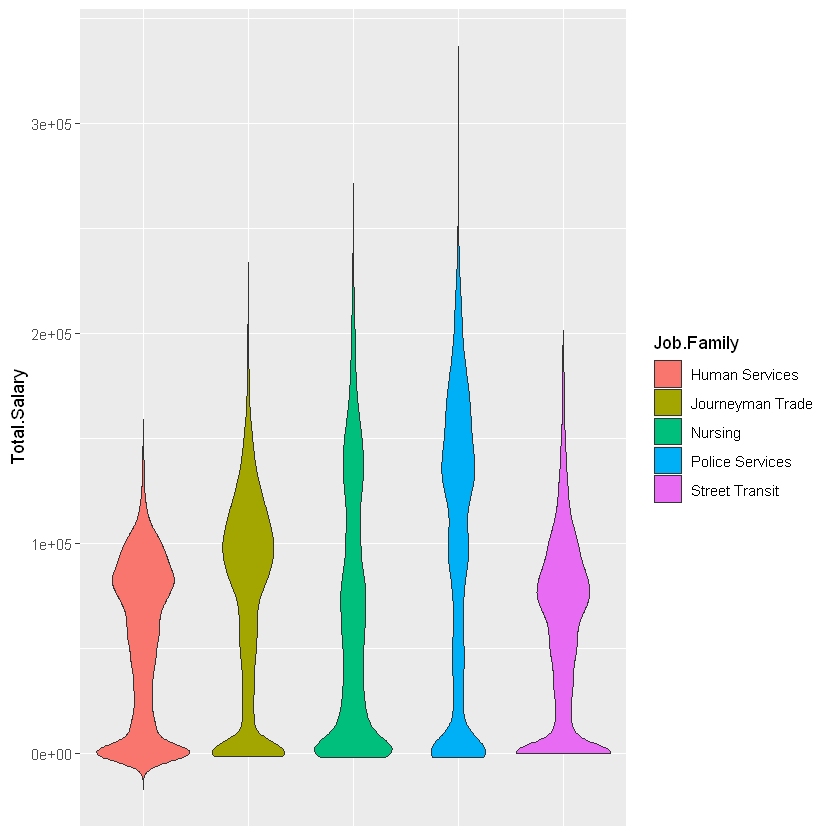

In [11]:
# Violin chart!

p <- ggplot(topSalaryByFamily, 
            aes(x=Job.Family, y=Total.Salary, fill=Job.Family)) + 
geom_violin() +
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

p

Some really interesting isights regarding densities of salaries can be drawn from here - most of the workers are either in low salary section or in slightly above average one. Only few percents are in top section.

<a id='aspect5'></a>

###  <span style="color:blue"> Aspect 5: </span>

_get all organization groups to loop through them later_

In [12]:
orgGroups <- unique(salaryData$Organization.Group)

Let's check **which Organisation groups get best Health and Dental**:

In [13]:
mean  <- stat.desc(salaryData$Health.and.Dental)[['mean']]

for(group in orgGroups){
  if(stat.desc(salaryData[salaryData$Organization.Group==group, 'Health.and.Dental'])[['mean']] >= mean){
      cat('For', group, 'health and dental is above average!')
  } else {
      cat('For', group, 'health and dental is not best one...')
  }
  cat('\n')
}

For General City Responsibilities health and dental is not best one...
For Public Protection health and dental is above average!
For Community Health health and dental is not best one...
For Public Works, Transportation & Commerce health and dental is above average!
For General Administration & Finance health and dental is not best one...
For Human Welfare & Neighborhood Development health and dental is not best one...
For Culture & Recreation health and dental is not best one...


Only Public Protection and Public Works, Transportation & Commerce have health and dental that are above average.

<a id='aspect6'></a>

###  <span style="color:blue"> Aspect 6: </span>

Let's now find **lowest paid jobs**:

In [14]:
mostLowestPaidJobs <- c()
i <- 0
lowestPaidJobs <- salaryData[order(salaryData[, 'Total.Salary']), c('Job', 'Total.Salary')]
while(length(mostLowestPaidJobs)<5){
    i <- i + 1
    if(lowestPaidJobs[i,'Total.Salary'] > 0 & !lowestPaidJobs[i,'Job'] %in% mostLowestPaidJobs){
        mostLowestPaidJobs <- c(mostLowestPaidJobs, as.character(lowestPaidJobs[i,'Job']))       
    }
 
}
mostLowestPaidJobs

[1] "Public Service Trainee"         "Police Officer 3"              
[3] "Secretary 2"                    "StdntDsgn Train2/Arch/Eng/Plng"
[5] "PS Aide Health Services"

Newspaper can draw attention to those important from sociological point of view roles, which got paid less than other!

<a id='aspect7'></a>

###  <span style="color:blue"> Aspect 7: </span>

Let's check **which Organisation groups give most benefits** to their workers:

In [15]:
mean  <- stat.desc(salaryData$Total.Benefits)[['mean']]

for(group in orgGroups){
  if(stat.desc(salaryData[salaryData$Organization.Group==group, 'Total.Benefits'])[['mean']] >= mean){
      cat('For', group, 'total benefits are above average!')
  } else {
      cat('For', group, 'total benefits are not really best...')
  }
  cat('\n')
}

For General City Responsibilities total benefits are not really best...
For Public Protection total benefits are above average!
For Community Health total benefits are above average!
For Public Works, Transportation & Commerce total benefits are above average!
For General Administration & Finance total benefits are above average!
For Human Welfare & Neighborhood Development total benefits are not really best...
For Culture & Recreation total benefits are not really best...


<a id='aspect8'></a>

###  <span style="color:blue"> Aspect 8: </span>

Let's find **biggest overtime values**:

In [16]:
overtime <- salaryData$Overtime
overtime <- overtime[order(-overtime)]
head(overtime)

[1] 307042.9 307042.9 307042.9 304546.2 283660.2 283660.2

Looks like some of the workers are really overdoing!

<a id='aspect9'></a>

###  <span style="color:blue"> Aspect 9: </span>

Now we want to see **biggest retirements contributions**:

In [17]:
retirement <- salaryData$Retirement
retirement <- retirement[order(-retirement)]
head(retirement, 10)

[1] 120791.40 120791.40 120791.40 120791.40 120791.40 120791.40 105052.98
 [8] 101306.01  98677.06  98677.06

City contributions to employee retirement plans are quite huge!

<a id='summary'></a>
![](https://essay-lib.com/wp-content/uploads/2018/08/Summary-800x400.jpg)
 
  
During the research next points were found:

- mean Salary is 54096
- most popular job families are:
    - Nursing
    - Street Transit
    - Police Services
    - Journeyman Trade
    - Human Services
- most of the workers are either in low salary section or in slightly above average one
- only Public Protection and Public Works, Transportation & Commerce have health and dental that are above average
- next jobs got paid the lowest:
    - Public Service Trainee
    - Police Officer 3 
    - Secretary 2 
    - StdntDsgn 
    - Train2/Arch/Eng/Plng 
    - PS Aide Health Services
- next Organisation groups give most benefits to their workers   
    - Public Protection
    - Community Health
    - Public Works, Transportation & Commerce
    - General Administration & Finance
- biggest overtime value is 307043
- biggest retirements contribution is 120791

<a id='recommendations'></a>
![](https://www.tibco.com/blog/wp-content/uploads/2015/01/TIBCO-Spotfire-Recommendations-Charting-a-Faster-Course-to-Analytic-Insights1.png)



Based on this data, newspaper can turn attention on next social problems:
- big overtiming;
- most of the workers are either in low salary section or in slightly above average one;
- only Public Protection and Public Works, Transportation & Commerce have health and dental that are above average;
- some important from sociological point of view jobs got paid the lowest;  
  
  
But also newspaper can speak about good things, such as
- huge retirements contributions;
- benefits to employees;

There is also some visualization, that can be included to the publication to draw more attention to it!